In [84]:
#this is a script for compiling data that has been fully parallelized on the cluster. 

import pandas as pd
import matplotlib.pyplot as plt
import string
import fnmatch
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import statistics
import paramiko
from paramiko import SSHClient
from scp import SCPClient


In [87]:
#Local variables: figure out how to automate.
JobIDint = 6490104
JOBID = str(JobIDint)
tree_sizes_1 = list(range(5,305,5))
tree_sizes_2 = [350,500,700, 900, 1000]
tree_sizes = tree_sizes_1 + tree_sizes_2
print(tree_sizes)
#tree_sizes = [10,25,50,75,100,350,500,700,900,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] # define the tree sizes that we have data for (aka: parameter combinations)
metric = 'mpd'
num_files = 1 #predetermine the number of files/runs. This is equivalent to the array_ID from the r script. 
transfer = False;

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 350, 500, 700, 900, 1000]


In [88]:
#establish connection with remote server and transfer files from filenam
#DO NOT RUN THIS UNLESS THE FILES HAVE NOT BEEN TRANSFERRED

if(transfer):
    hoffman2_path_output = '/u/home/m/mchari/bird/Parallel_Hoffman_full/' + JOBID + '_output_files'
    ssh_ob = SSHClient()
    ssh_ob.load_system_host_keys()
    ssh_ob.connect('hoffman2.idre.ucla.edu', username = 'mchari', password= 'Xf4p4D24')
    scp = SCPClient(ssh_ob.get_transport())
    scp.get(hoffman2_path_output, recursive = True)
    print("transfer is done")
    transfer = False;
else:
    print("transfer already complete")
    
#set up local direrctory and establish folder as target
cwd = os.getcwd()
target_directory = os.getcwd() + "/"+ JOBID +"_output_files/"

transfer already complete


In [89]:
print(target_directory)
#look at one mpd randomization from one trial to see sample data structure. 
target_file_get = target_directory +  "100_3992out.csv"
print(target_file_get)
df = pd.read_csv(target_file_get)
df.index =['pd', 'mpd', "mntd"]
print(df)
#df.iloc[0]['mpd.rnd']

stat_temp = df.loc['mpd']
print(stat_temp)


/Users/mayachari/Desktop/bird/Parallel_Hoffman_full/6490104_output_files/
/Users/mayachari/Desktop/bird/Parallel_Hoffman_full/6490104_output_files/100_3992out.csv
            trial      trial.1      trial.2      trial.3      trial.4
pd    7844.257842  7640.635044  7762.825492  8224.292926  8080.083796
mpd    301.698927   294.491422   306.098160   290.763585   301.174593
mntd   125.988690   110.652474   123.118859   121.874387   130.365231
trial      301.698927
trial.1    294.491422
trial.2    306.098160
trial.3    290.763585
trial.4    301.174593
Name: mpd, dtype: float64


In [90]:
# Create dictionary class

class my_dictionary(dict):
 
  # __init__ function
  def __init__(self):
    self = dict()
 
  # Function to add key:value
  def add(self, key, value):
    self[key] = value


In [91]:

#right now the mean part of this function is redundant but I'm keeping it in just in case. 
#avg_mpd_rand = []

#choice of 2 statistics: mpd, mntd
def div_stats(tree_sizes, JobIDint, target_directory, target_statistic):
    dict_mpd = my_dictionary() #initialize new dictionary 
    
    #i don't know why i did it this way. can't remember. 
    if target_statistic == "mpd":
        target_val = 'mpd'
    elif target_statistic == "mntd":
        target_val = 'mntd'
    elif target_statistic == "pd":
        target_val = 'pd'
    else:
        print("error") #add an error
    for i in tree_sizes:
        size = str(i) #gets the i'th data. 
        count = 0
        mpd_sum = 0
        array_temp = []
        name = target_statistic + str(i)
        for file in os.listdir(target_directory): #search every file in the target directory. 
            if file.startswith(size + "_"):
                direct = target_directory + file #go to the directory
                temp_df = pd.read_csv(direct) #read in the csv. 
                temp_df.index =['pd', 'mpd', "mntd"]
                stat_temp = temp_df.loc[target_val]
                #mpd_sum = mpd_sum + temp_df.iloc[0][target_val]
                #count  = count + 1
                array_temp.extend(stat_temp)
        #average_mpd_rnd.append(mpd_sum/count)
        dict_mpd.add(name, array_temp)
    
    return dict_mpd
    
        #average_mpd_rnd.append(mpd.rand)




In [92]:
#TODO: write this to a csv somehow so I can delete that massive file. 

new_mpd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'mpd')
new_mntd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'mntd')
new_pd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'pd')


In [94]:
#
new_mpd = new_mpd_smallvals
new_mntd = new_mntd_smallvals
new_pd = new_pd_smallvals


245.544338295 365.8293818433331


/var/folders/y2/xc9jb_w133n8tymks1sbxh7m0000gp/T/ipykernel_69089/1612283076.py:3: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))


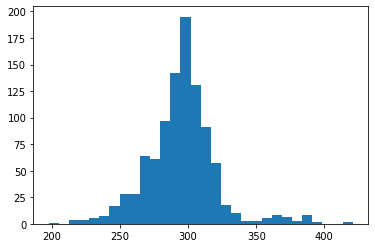

In [95]:
data = mpd['mpd10']
plt.hist(data, bins =30)
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 


#using classical statistics and assuming normal distribution 
std = statistics.stdev(data)
mean = np.mean(data)
lower_level = mean-1.960*(std/(np.sqrt(len(data)+1)))
lower_level
upper_level = mean+1.960*(std/(np.sqrt(len(data)+1)))
upper_level
#X  ±  Z s√n 


upper_bound_bootstrap = np.percentile(data,97.5)
lower_bound_bootstrap = np.percentile(data,2.5)

print(lower_bound_bootstrap, upper_bound_bootstrap)



In [1]:
#print(dict_mpd.keys())
#print(np.mean(dict_mpd['mpd10']))
#print(np.mean(dict_mpd['mpd10']))
#print(new_mpd['mpd10'])
plt.hist(new_pd['pd5'],bins = 20)
plt.hist(new_pd['pd10'],bins = 20)
plt.hist(new_pd['pd15'],bins = 20)
plt.hist(new_pd['pd20'],bins = 20)
plt.hist(new_pd['pd25'],bins = 20)
plt.hist(new_pd['pd30'],bins = 20)
plt.hist(new_pd['pd35'],bins = 20)
plt.hist(new_pd['pd40'],bins = 20)
plt.hist(new_pd['pd45'],bins = 20)
plt.hist(new_pd['pd50'],bins = 20)
plt.hist(new_pd['pd100'],bins = 20)
plt.hist(new_pd['pd200'],bins = 20)
plt.hist(new_pd['pd500'],bins = 20)
plt.hist(new_pd['pd1000'],bins = 20)
#plt.hist(new_mpd['mpd50'])
#plt.hist(new_mpd['mpd100'])
#plt.hist(new_mpd['mpd1000'])
plt.title('expected pd histograms across multiple tree sizes')
plt.xlabel('pd')
plt.ylabel('frequency')
labels = ("5","10","15","20","25", "30", "35", "40", "45", "50", "100", "200", "500", "1000")
plt.legend(labels)
plt.savefig('pd_histograms.jpg', dpi=300)

NameError: name 'plt' is not defined

In [59]:
#TODO: make function to get confidence interval and means. 
#CI TODO: check whether z or t is used. don't know variance or mean. Should use t distribution. 
def CI_conglomerate(dictionary): #assuming normal distribution
    low_array = []
    high_array = []
    mean_array = []
    for key in dictionary.keys():
        mean_temp = np.mean(dictionary[key])
        CI_temp = st.t.interval(confidence=0.95, df=len(dictionary[key])-1, loc=np.mean(dictionary[key]), scale=st.sem(dictionary[key]))
        low_array.append(CI_temp[0])
        high_array.append(CI_temp[1])
        mean_array.append(mean_temp)
    return(low_array,high_array,mean_array)

new_CI = CI_conglomerate(new_mpd)
print(new_CI)

([292.7694526960727, 293.56748867886245, 292.54331192140785, 294.5293281755427, 293.5396074463147, 294.83410057115987, 294.15582061927, 293.47852727166486, 294.1546436532602, 294.03231683658043, 294.27339015268353, 294.3817968877945, 293.8852930350457, 294.7909311057111, 294.66185254383174, 294.511786201861, 294.8258732011552, 294.3116324971207, 294.29238147325367, 294.65694855946043, 294.61951462019937, 294.63287937012484, 294.3237696604977, 294.47328018403834, 294.3997309873855, 294.4080898210489, 294.56708098753535, 294.706052730168, 294.66470507343746, 294.64177801218216, 294.7007467463976, 294.5327273312274, 294.46890060876274, 294.3981926397939, 294.82505113502845, 294.53920662243485, 294.5417824086962, 294.50090271900933, 295.0421584759534, 294.7757734810433, 294.720669451955, 294.680411007421, 294.61185294402196, 294.6477383547662, 294.41399368957696, 294.5043431861515, 294.6994488581006, 294.78493048641843, 294.7290628521282, 294.85925205555014, 294.5917667205729, 294.69203116

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encount

In [97]:
def CI_bootstrap(dictionary): #assuming normal distribution
    low_array = []
    high_array = []
    mean_array = []
    for key in dictionary.keys():
        print(key)
        data_temp = dictionary[key]
        upper_bound_bootstrap = np.percentile(data_temp,97.5)
        print(upper_bound_bootstrap)
        lower_bound_bootstrap = np.percentile(data_temp,2.5)
        low_array.append(lower_bound_bootstrap)
        high_array.append(upper_bound_bootstrap)
        mean_array.append(np.mean(dictionary[key]))
    return(low_array,high_array,mean_array)



In [103]:
CI_mpd_bootstrap = CI_bootstrap(new_mpd) #CI for mpd

CI_mntd_bootstrap = CI_bootstrap(new_mntd)  #CI for mntd

CI_pd_bootstrap = CI_bootstrap(new_pd)

mpd5
353.01618901999996
mpd10
365.8293818433331
mpd15
349.49669136619053
mpd20
342.6159329444736
mpd25
329.9922639621667
mpd30
329.90860907517236
mpd35
324.75699901697516
mpd40
318.77563500506443
mpd45
319.3407040352018
mpd50
317.0959409294289
mpd55
315.9265959826932
mpd60
317.42901296259885
mpd65
313.81991551540824
mpd70
314.6149220257042
mpd75
314.6471238304323
mpd80
312.97242336968344
mpd85
313.723251053389
mpd90
312.4108050486642
mpd95
310.8079138675584
mpd100
311.082210795717
mpd105
310.6214630151193
mpd110
309.98514291882776
mpd115
309.98377607465284
mpd120
307.9207780114008
mpd125
309.0209257896129
mpd130
308.21717457034583
mpd135
307.29712148446146
mpd140
308.00950900650844
mpd145
309.1792142510869
mpd150
307.98721083847386
mpd155
307.9399462175074
mpd160
307.09609051444545
mpd165
306.966103032409
mpd170
305.65802052827746
mpd175
307.18017385691286
mpd180
306.15928154006497
mpd185
306.9345179938782
mpd190
305.2206709060832
mpd195
306.6396745402775
mpd200
306.0370506509112
mpd20

In [129]:
#target_directory = os.getcwd() + "/"+ JOBID +"_output_files/"


#os.listdir(target_directory)

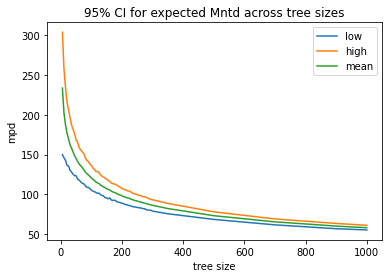

In [106]:
#print(average_mpd_rnd)

plt.plot(tree_sizes, CI_mntd_bootstrap[0])
plt.plot(tree_sizes, CI_mntd_bootstrap[1])
plt.plot(tree_sizes,CI_mntd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("mpd")
plt.xlabel("sample size")
plt.title('95% CI for expected Mntd across tree sizes')
plt.xlabel('tree size')
plt.ylabel('mpd')
plt.legend(labels2)
plt.savefig('pd_95CI.jpg', dpi=300)



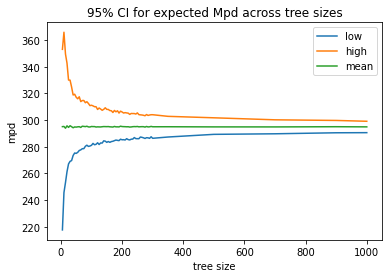

In [107]:
plt.plot(tree_sizes, CI_mpd_bootstrap[0])
plt.plot(tree_sizes, CI_mpd_bootstrap[1])
plt.plot(tree_sizes,CI_mpd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("mpd")
plt.xlabel("sample size")
plt.title('95% CI for expected Mpd across tree sizes')
plt.xlabel('tree size')
plt.ylabel('mpd')
plt.legend(labels2)
plt.savefig('pd_95CI.jpg', dpi=300)



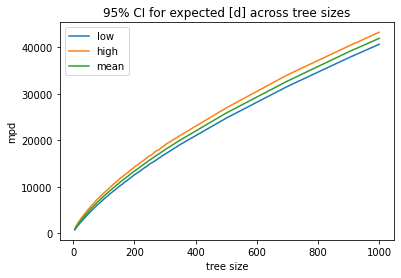

In [108]:
plt.plot(tree_sizes, CI_pd_bootstrap[0])
plt.plot(tree_sizes, CI_pd_bootstrap[1])
plt.plot(tree_sizes,CI_pd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("mpd")
plt.xlabel("sample size")
plt.title('95% CI for expected [d] across tree sizes')
plt.xlabel('tree size')
plt.ylabel('mpd')
plt.legend(labels2)
plt.savefig('pd_95CI.jpg', dpi=300)

In [111]:
CI_export_mpd = pd.DataFrame(CI_mpd_bootstrap)
CI_colnames = dict.keys(new_mpd)
CI_export_mpd.columns = CI_colnames
CI_export_mpd.index = ["Low", "High", "Mean"]
CI_export_mpd.to_csv("CI_mpd_output_bootstrap.csv")


In [113]:
CI_export_mntd = pd.DataFrame(CI_mntd_bootstrap)
CI_colnames = dict.keys(new_mntd)
CI_export_mntd.columns = CI_colnames
CI_export_mntd.index = ["Low", "High", "Mean"]
CI_export_mntd.to_csv("CI_mntd_output_bootstrap.csv")

In [112]:
CI_export_pd = pd.DataFrame(CI_pd_bootstrap)
CI_colnames = dict.keys(new_pd)
CI_export_pd.columns = CI_colnames
CI_export_pd.index = ["Low", "High", "Mean"]
CI_export_pd.to_csv("CI_pd_output_bootstrap.csv")

                   0           1           2
mpd10     204.463720  294.237310  254.351177
mpd25     239.276267  306.549322  273.200676
mpd50     259.076900  299.943128  278.655261
mpd75     263.802600  298.574070  281.164877
mpd100    266.641172  296.312715  281.922264
mpd350    277.550120  293.661700  284.766678
mpd500    278.902140  291.201710  284.996554
mpd700    278.806100  291.229400  285.068657
mpd900    280.464045  290.208788  285.354417
mpd1000   280.994243  290.451200  285.785992
mpd2000   283.479300  290.274515  286.602714
mpd3000   285.300335  290.371170  287.768884
mpd4000   287.015085  290.682205  288.878811
mpd5000   288.202800  291.508200  289.832533
mpd6000   289.754405  292.608900  291.126389
mpd7000   291.076040  293.178485  292.157583
mpd8000   292.174015  294.068200  293.157555
mpd9000   293.133900  294.701500  293.888918
mpd10000  293.876400  294.957723  294.427390


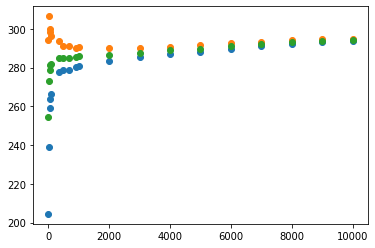